In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\MR MOSES\Desktop\data\archive (12)\fossil-fuel-co2-emissions-by-nation.csv")
df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


## Description of dataset
Fossil fuel use is the primary source of CO2. The data throws light onto how much fossil fuels are burnt, per year per nation, which amounts to an increase in CO2 every year.

## Field information

- Year: Year
- Country: string Nation
- Total number Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
- Solid Fuel number: Carbon emissions from solid fuel consumption
- Liquid Fuel number: Carbon emissions from liquid fuel consumption
- Gas Fuel: number Carbon emissions from gas fuel consumption
- Cement number: Carbon emissions from cement production
- Gas Flaring number: Carbon emissions from gas flaring
- Per Capita number: Per capita carbon emissions (metric tons of carbon; after 1949 only)
- Bunker fuels number: Carbon emissions from bunker fuels (not included in total)


## Data cleaning

In [3]:
#Checking for the sum of null values
df.isnull().sum()

Year                           0
Country                        0
Total                          0
Solid Fuel                     0
Liquid Fuel                    0
Gas Fuel                       0
Cement                         0
Gas Flaring                    0
Per Capita                     0
Bunker fuels (Not in Total)    0
dtype: int64

In [4]:
#checking for duplicated rows
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         17232 non-null  int64  
 1   Country                      17232 non-null  object 
 2   Total                        17232 non-null  int64  
 3   Solid Fuel                   17232 non-null  int64  
 4   Liquid Fuel                  17232 non-null  int64  
 5   Gas Fuel                     17232 non-null  int64  
 6   Cement                       17232 non-null  int64  
 7   Gas Flaring                  17232 non-null  int64  
 8   Per Capita                   17232 non-null  float64
 9   Bunker fuels (Not in Total)  17232 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


In [6]:
df.describe()

,Year,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
count,17232.000000,1.723200e+04,1.723200e+04,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000
mean,1961.579561,2.268712e+04,1.107010e+04,7589.085829,3189.767700,638.453865,199.718489,0.907776,560.330606
std,44.251691,1.132419e+05,6.206518e+04,39057.928585,20714.456024,6631.010202,1087.880733,2.194268,2414.320487
min,1751.000000,-1.473000e+03,-1.030000e+02,-4663.000000,-40.000000,0.000000,0.000000,-0.680000,0.000000
25%,1944.000000,1.170000e+02,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,9.645000e+02,5.400000e+01,263.000000,0.000000,7.000000,0.000000,0.130000,4.000000
75%,1995.000000,8.059250e+03,2.002500e+03,2165.750000,71.000000,162.000000,0.000000,1.010000,133.000000
max,2014.000000,2.806634e+06,2.045156e+06,680284.000000,390719.000000,338912.000000,20520.000000,45.960000,45630.000000


## Exploratory Data Analysis (EDA)

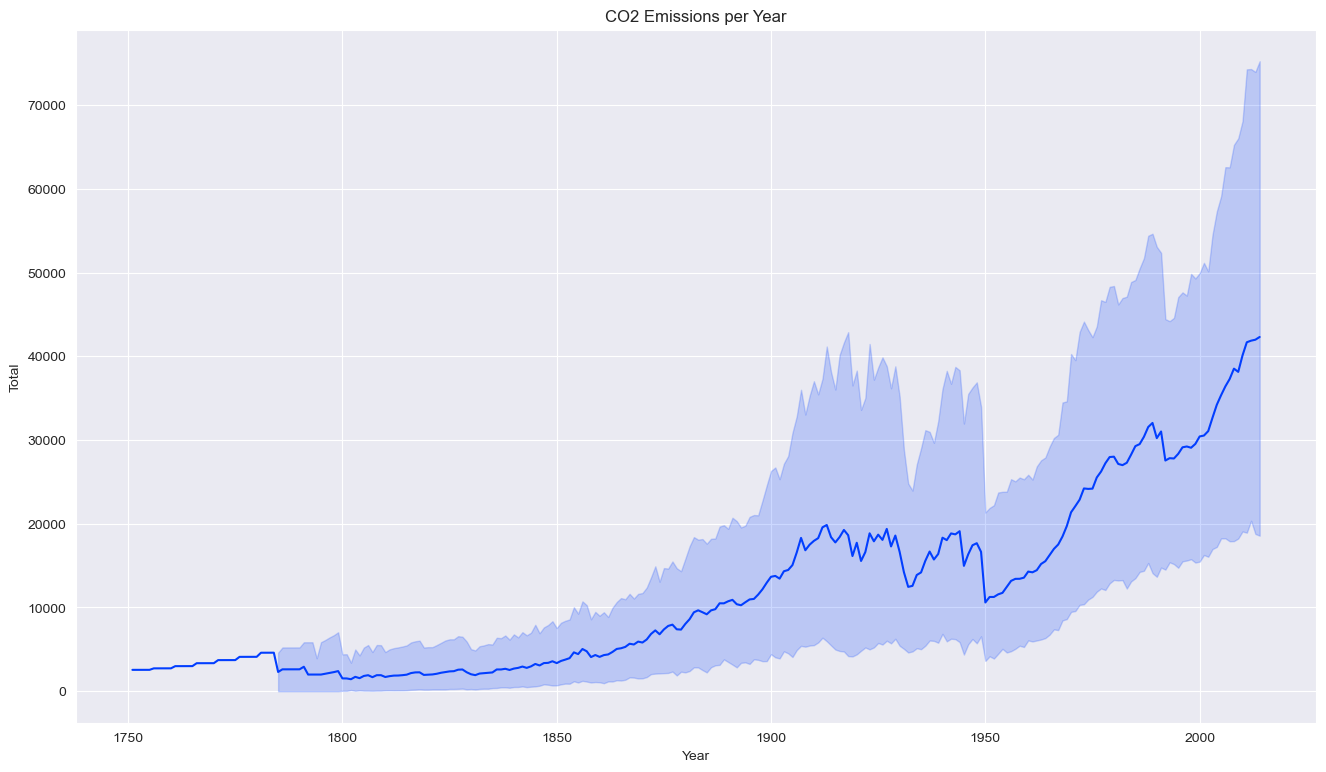

In [7]:
#Total emissions produced by year
sns.set_palette('bright')
sns.set_style('darkgrid')
plt.figure(figsize=(16,9))
sns.lineplot(data=df, x='Year', y='Total')
plt.title('CO2 Emissions per Year')
plt.show()

We can see a stable rise from the mid 1700s to the early 21st century

In [8]:
#Top 10 CO2 emitting coutries since 1750
a=df.groupby('Country')[['Total']].sum().sort_values(by='Total', ascending=False).head(10).reset_index()
a

,Country,Total
0,UNITED STATES OF AMERICA,102510260
1,CHINA (MAINLAND),47649834
2,USSR,30790355
3,UNITED KINGDOM,20500813
4,JAPAN,14585037
5,GERMANY,12764185
6,INDIA,11385351
7,RUSSIAN FEDERATION,10466421
8,FRANCE (INCLUDING MONACO),9697149
9,CANADA,8038299


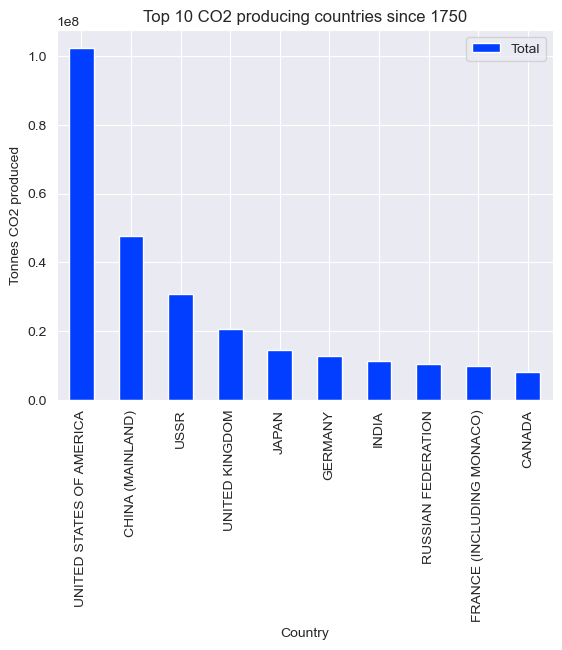

In [9]:
#Top 10 CO2 producing countries since 1750
a.plot(x='Country',y='Total', kind='bar')
plt.title('Top 10 CO2 producing countries since 1750')
plt.ylabel('Tonnes CO2 produced')
#plt.xticks(rotation=60)
plt.show()

In [10]:
b=df.groupby('Country')[['Solid Fuel']].sum().sort_values(by='Solid Fuel', ascending=False).head(10).reset_index()
b

,Country,Solid Fuel
0,UNITED STATES OF AMERICA,45118555
1,CHINA (MAINLAND),36465932
2,UNITED KINGDOM,15389847
3,USSR,15021732
4,GERMANY,9558059
5,INDIA,7675924
6,POLAND,5916215
7,FRANCE (INCLUDING MONACO),5042414
8,JAPAN,4617433
9,SOUTH AFRICA,4359409


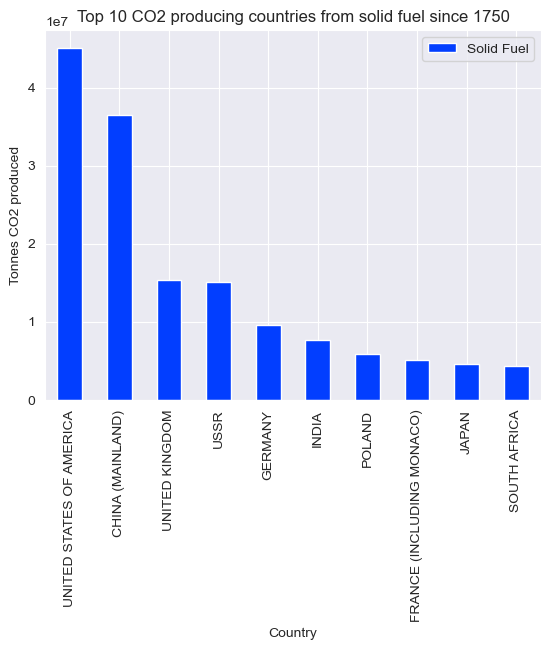

In [11]:
#Top 10 CO2 producing countries from solid fuel since 1750
b.plot(x='Country',y='Solid Fuel', kind='bar')
plt.title('Top 10 CO2 producing countries from solid fuel since 1750')
plt.ylabel('Tonnes CO2 produced')
#plt.xticks(rotation=60)
plt.show()

In [12]:
c=df.groupby('Country')[['Liquid Fuel']].sum().sort_values(by='Liquid Fuel', ascending=False).head(10).reset_index()
c

,Country,Liquid Fuel
0,UNITED STATES OF AMERICA,38394455
1,USSR,10051007
2,JAPAN,8092780
3,CHINA (MAINLAND),6546080
4,FRANCE (INCLUDING MONACO),3627997
5,CANADA,3539211
6,ITALY (INCLUDING SAN MARINO),3385248
7,UNITED KINGDOM,3320154
8,MEXICO,3231761
9,INDIA,2723599


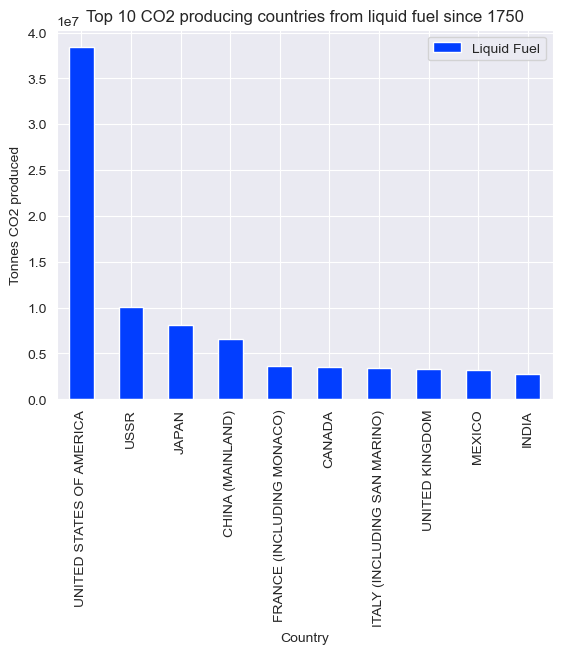

In [13]:
#Top 10 CO2 producing countries from liquid fuel since 1750
c.plot(x='Country',y='Liquid Fuel', kind='bar')
plt.title('Top 10 CO2 producing countries from liquid fuel since 1750')
plt.ylabel('Tonnes CO2 produced')
#plt.xticks(rotation=60)
plt.show()

In [14]:
d=df.groupby('Country')[['Gas Fuel']].sum().sort_values(by='Gas Fuel', ascending=False).head(10).reset_index()
d

,Country,Gas Fuel
0,UNITED STATES OF AMERICA,18008958
1,USSR,5063003
2,RUSSIAN FEDERATION,4999104
3,CANADA,1850170
4,UNITED KINGDOM,1602855
5,JAPAN,1356984
6,ISLAMIC REPUBLIC OF IRAN,1261314
7,ITALY (INCLUDING SAN MARINO),1205749
8,GERMANY,1065143
9,NETHERLANDS,930754


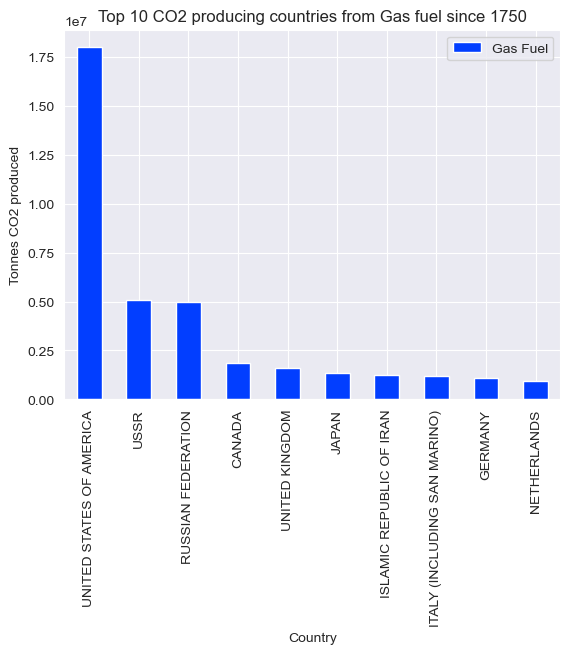

In [15]:
#Top 10 CO2 producing countries from liquid fuel since 1750
d.plot(x='Country',y='Gas Fuel', kind='bar')
plt.title('Top 10 CO2 producing countries from Gas fuel since 1750')
plt.ylabel('Tonnes CO2 produced')
#plt.xticks(rotation=60)
plt.show()

In [16]:
e=df.groupby('Country')[['Bunker fuels (Not in Total)']].sum().sort_values(by='Bunker fuels (Not in Total)', ascending=False).head(10).reset_index()
e

,Country,Bunker fuels (Not in Total)
0,UNITED STATES OF AMERICA,1560803
1,SINGAPORE,725998
2,NETHERLANDS,596990
3,JAPAN,531140
4,UNITED KINGDOM,458581
5,SAUDI ARABIA,332248
6,SPAIN,304730
7,FRANCE (INCLUDING MONACO),289481
8,ITALY (INCLUDING SAN MARINO),276055
9,UNITED ARAB EMIRATES,265451


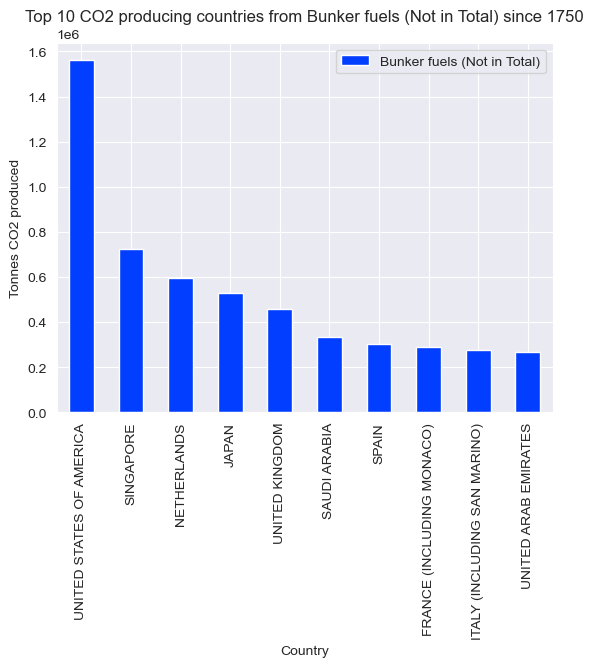

In [17]:
#Top 10 CO2 producing countries from liquid fuel since 1750
e.plot(x='Country',y='Bunker fuels (Not in Total)', kind='bar')
plt.title('Top 10 CO2 producing countries from Bunker fuels (Not in Total) since 1750')
plt.ylabel('Tonnes CO2 produced')
#plt.xticks(rotation=60)
plt.show()

## Results
We can clearly see that the united states in the leading nations since 1750 in emitting CO2 into the atmosphere. In the upcoming parts of the report we will focus on the USA, USSR, CHINA specifically in the 21st century.

In [18]:
new_df=df[df['Country']=='UNITED STATES OF AMERICA']
USA_df=new_df[new_df['Year']>1999].reset_index()

new_df=df[df['Country']=='RUSSIAN FEDERATION']
USSR_df=new_df[new_df['Year']>1999].reset_index()

new_df=df[df['Country']=='CHINA (MAINLAND)']
CHA_df=new_df[new_df['Year']>1999].reset_index()

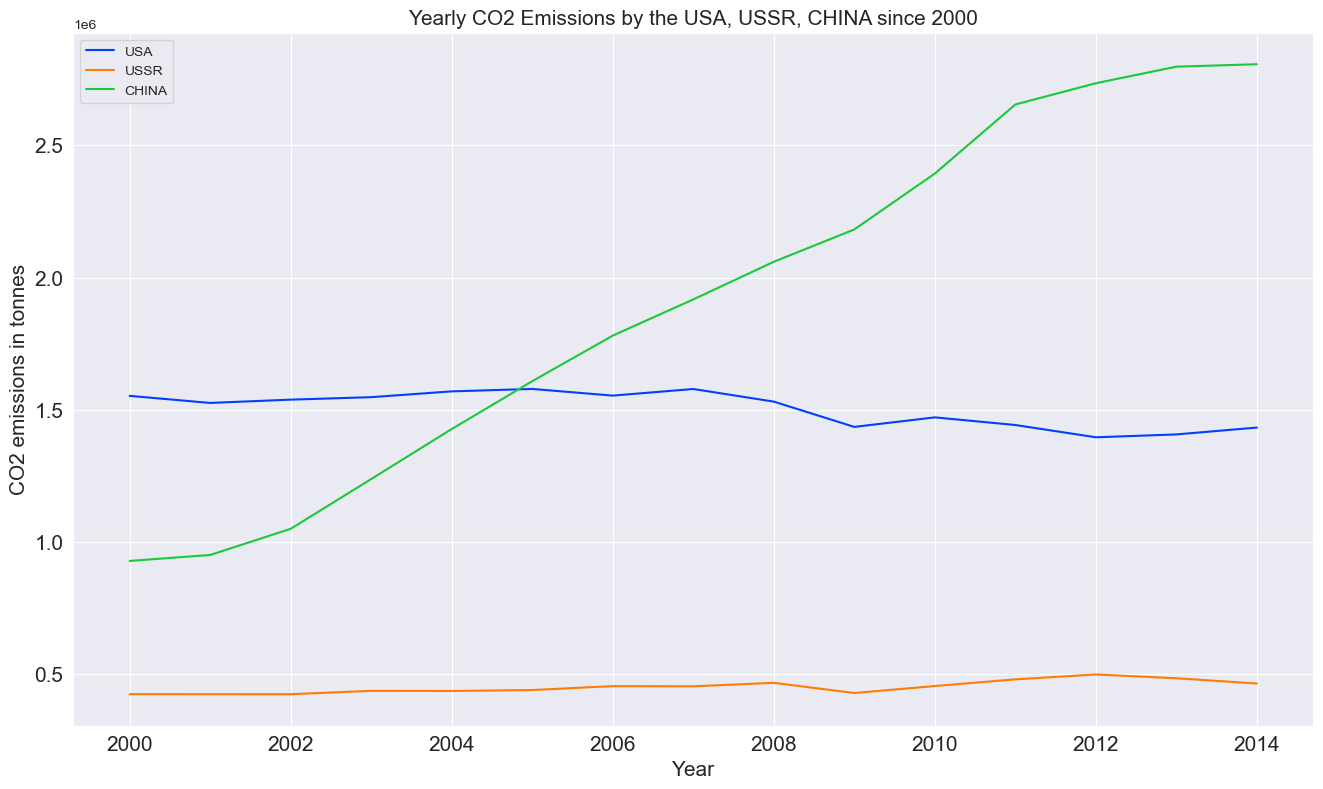

In [19]:
#Yearly CO2 Emissions by the USA, USSR and CHINA since 2000
f=USA_df.groupby('Year')[['Total']].sum().sort_values(by='Year', ascending=True).reset_index()
g=USSR_df.groupby('Year')[['Total']].sum().sort_values(by='Year', ascending=True).reset_index()
h=CHA_df.groupby('Year')[['Total']].sum().sort_values(by='Year', ascending=True).reset_index()

Legend=['USA', 'USSR', 'CHINA']
plt.figure(figsize=(16,9))
plt.plot(f['Year'], f['Total'])
plt.plot(g['Year'], g['Total'])
plt.plot(h['Year'], h['Total'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO2 emissions in tonnes', fontsize=15)
plt.title('Yearly CO2 Emissions by the USA, USSR, CHINA since 2000', fontsize=15)
plt.legend(Legend)
plt.show()

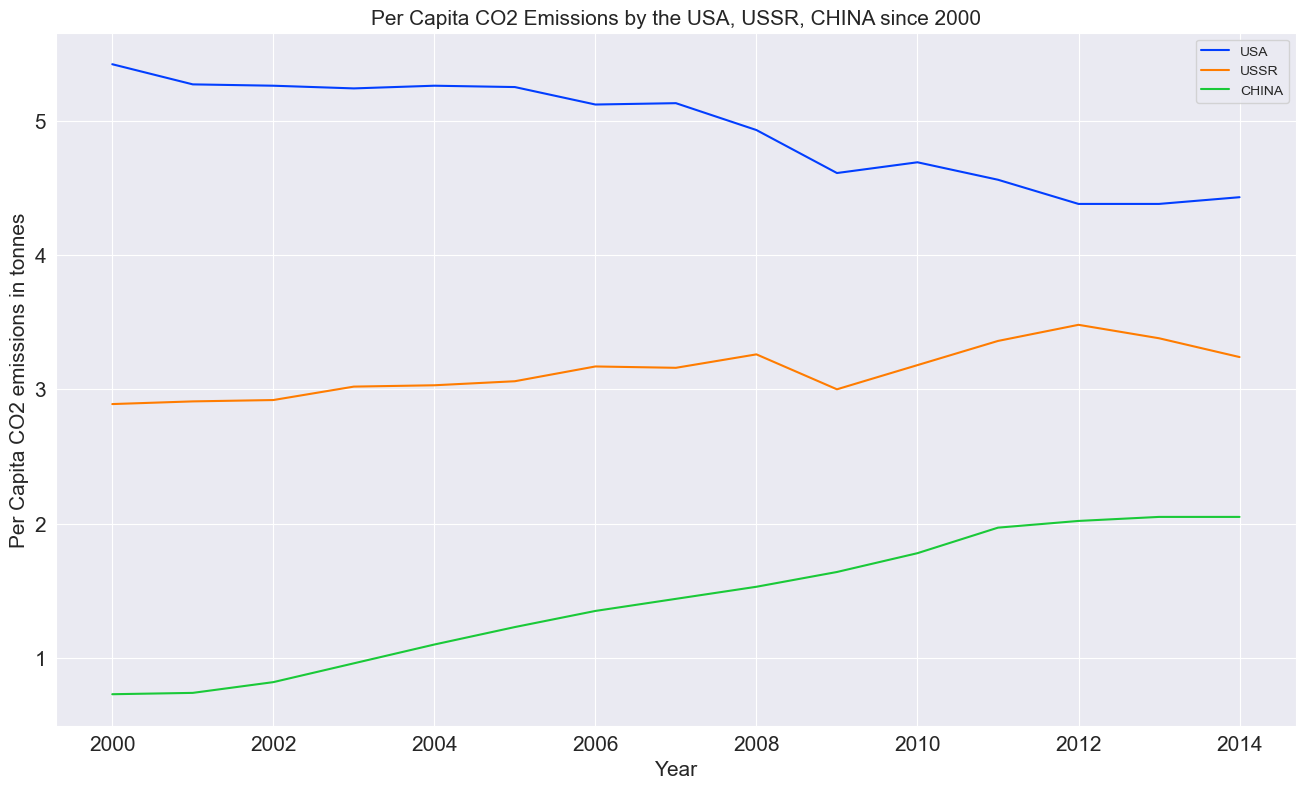

In [23]:
#Per Capita CO2 Emissions by the USA, USSR and CHINA since 2000
f=USA_df.groupby('Year')[['Per Capita']].sum().sort_values(by='Year', ascending=True).reset_index()
g=USSR_df.groupby('Year')[['Per Capita']].sum().sort_values(by='Year', ascending=True).reset_index()
h=CHA_df.groupby('Year')[['Per Capita']].sum().sort_values(by='Year', ascending=True).reset_index()

Legend=['USA', 'USSR', 'CHINA']
plt.figure(figsize=(16,9))
plt.plot(f['Year'], f['Per Capita'])
plt.plot(g['Year'], g['Per Capita'])
plt.plot(h['Year'], h['Per Capita'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Per Capita CO2 emissions in tonnes', fontsize=15)
plt.title('Per Capita CO2 Emissions by the USA, USSR, CHINA since 2000', fontsize=15)
plt.legend(Legend)
plt.show()

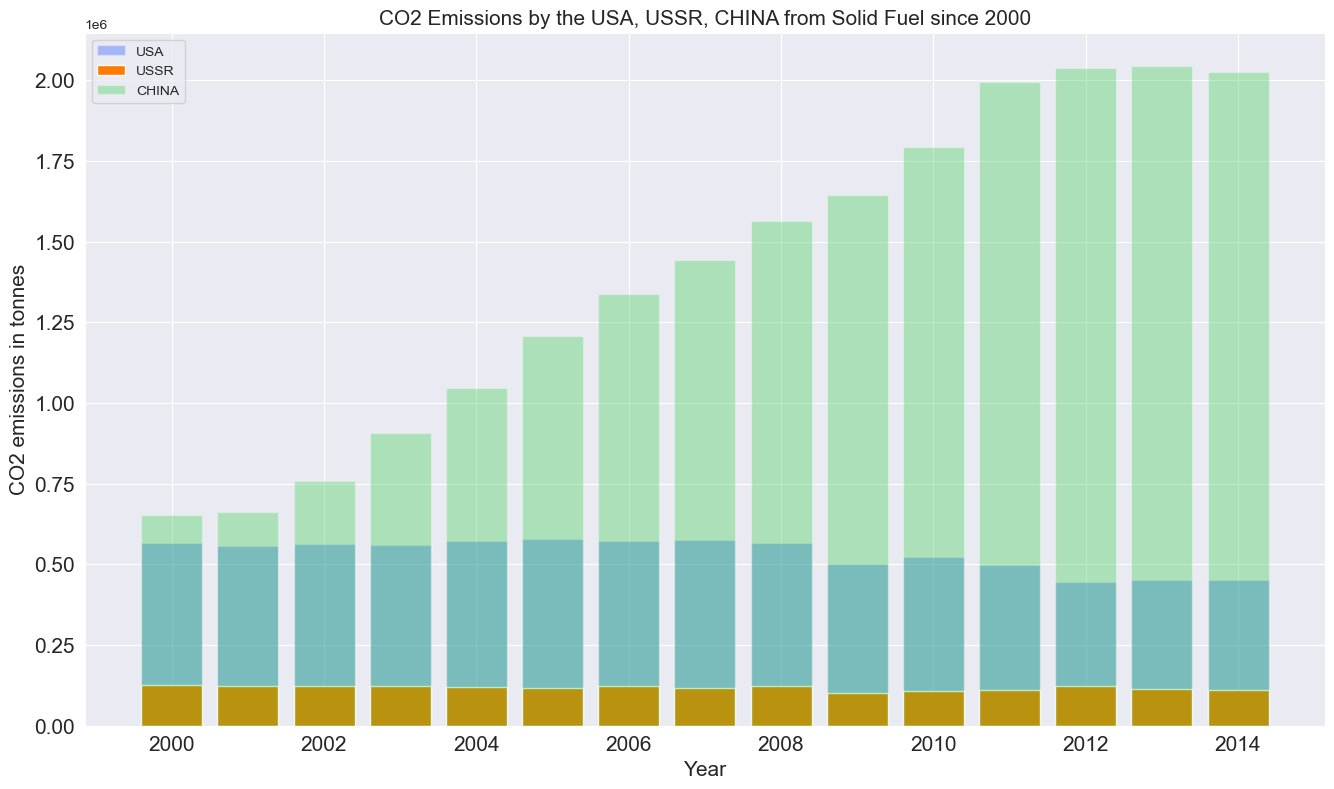

In [29]:
#CO2 Emissions by the USA, USSR and CHINA from solid fuel since 2000
f=USA_df.groupby('Year')[['Solid Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()
g=USSR_df.groupby('Year')[['Solid Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()
h=CHA_df.groupby('Year')[['Solid Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()

Legend=['USA', 'USSR', 'CHINA']
plt.figure(figsize=(16,9))
plt.bar(f['Year'], f['Solid Fuel'], alpha=0.3)
plt.bar(g['Year'], g['Solid Fuel'])
plt.bar(h['Year'], h['Solid Fuel'], alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO2 emissions in tonnes', fontsize=15)
plt.title('CO2 Emissions by the USA, USSR, CHINA from Solid Fuel since 2000', fontsize=15)
plt.legend(Legend)
plt.show()

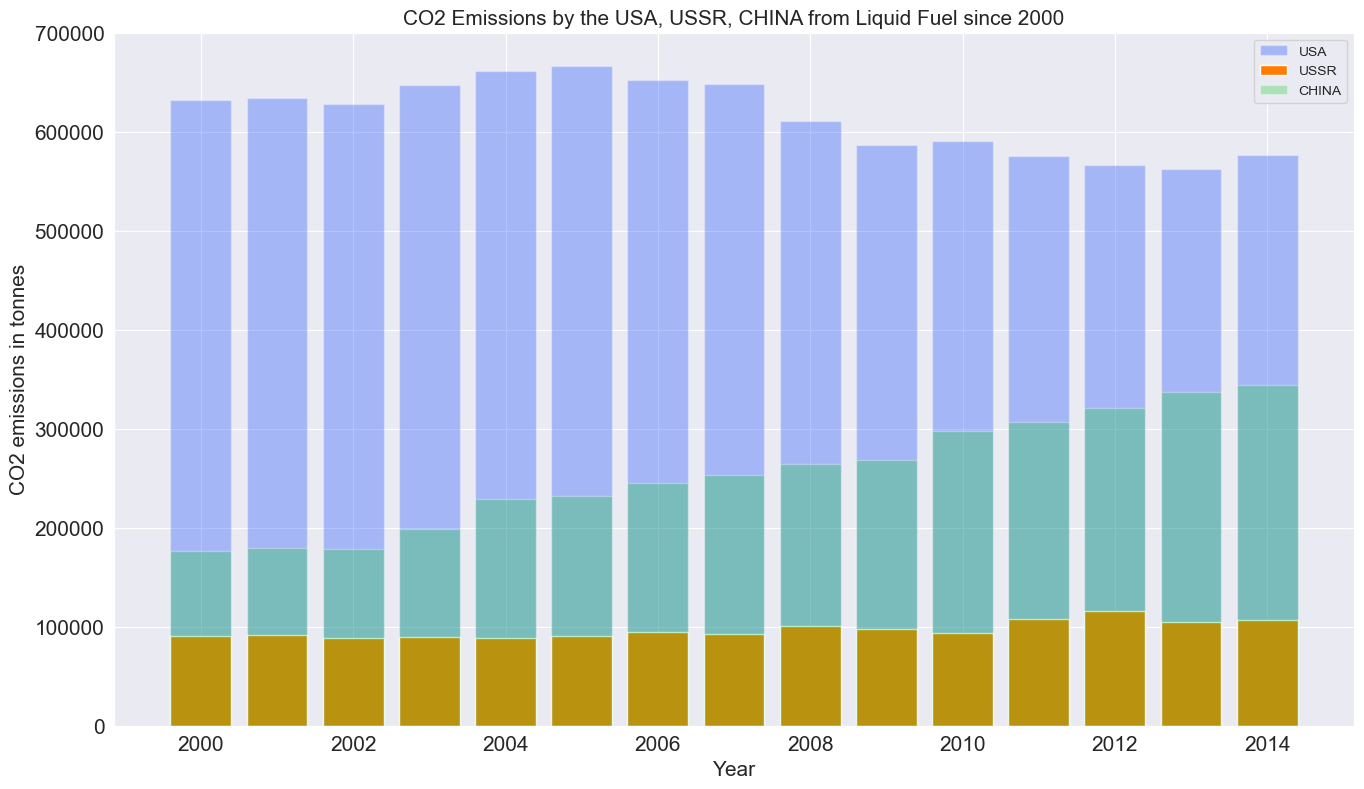

In [30]:
#CO2 Emissions by the USA, USSR and CHINA from Liquid fuel since 2000
f=USA_df.groupby('Year')[['Liquid Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()
g=USSR_df.groupby('Year')[['Liquid Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()
h=CHA_df.groupby('Year')[['Liquid Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()

Legend=['USA', 'USSR', 'CHINA']
plt.figure(figsize=(16,9))
plt.bar(f['Year'], f['Liquid Fuel'], alpha=0.3)
plt.bar(g['Year'], g['Liquid Fuel'])
plt.bar(h['Year'], h['Liquid Fuel'], alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO2 emissions in tonnes', fontsize=15)
plt.title('CO2 Emissions by the USA, USSR, CHINA from Liquid Fuel since 2000', fontsize=15)
plt.legend(Legend)
plt.show()

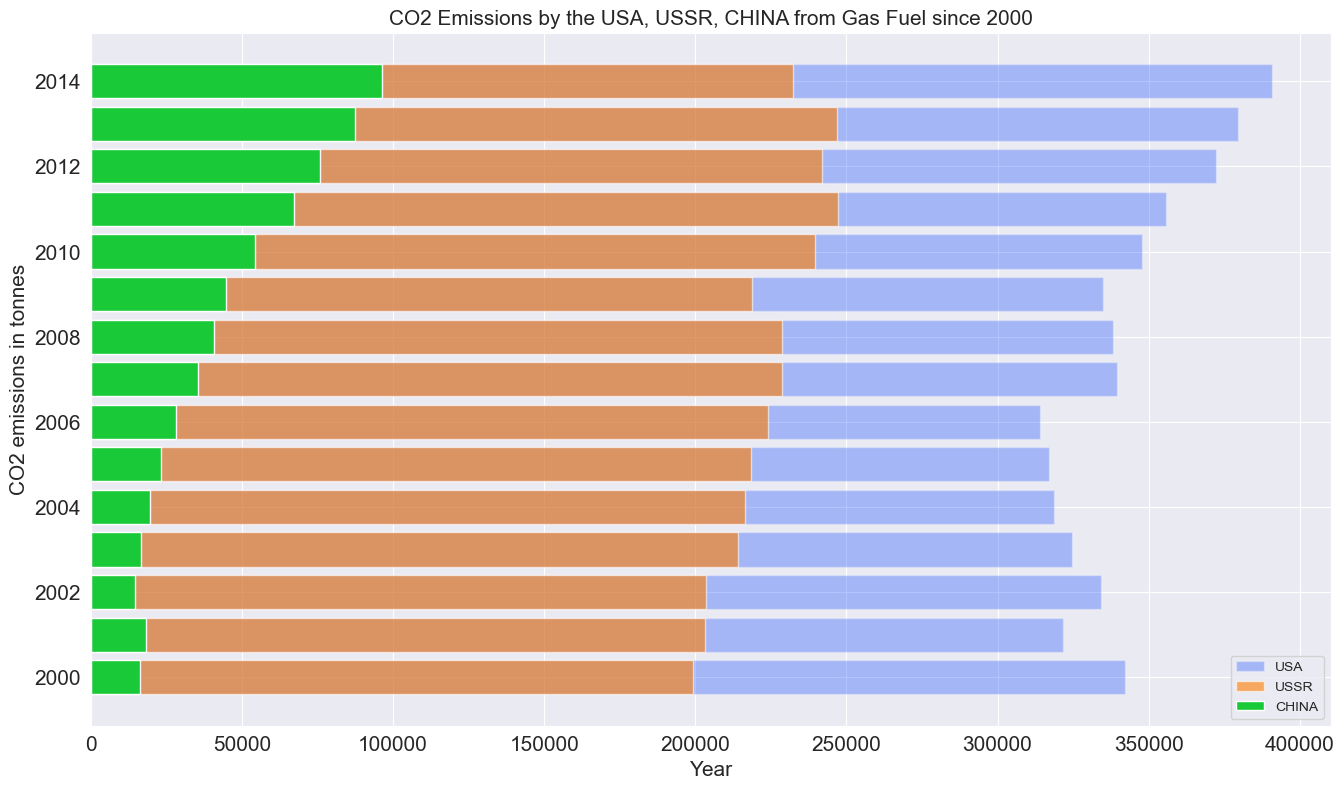

In [35]:
#CO2 Emissions by the USA, USSR and CHINA from gas fuel since 2000
f=USA_df.groupby('Year')[['Gas Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()
g=USSR_df.groupby('Year')[['Gas Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()
h=CHA_df.groupby('Year')[['Gas Fuel']].sum().sort_values(by='Year', ascending=True).reset_index()

Legend=['USA', 'USSR', 'CHINA']
plt.figure(figsize=(16,9))
plt.barh(f['Year'], f['Gas Fuel'], alpha=0.3)
plt.barh(g['Year'], g['Gas Fuel'], alpha=0.6)
plt.barh(h['Year'], h['Gas Fuel'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO2 emissions in tonnes', fontsize=15)
plt.title('CO2 Emissions by the USA, USSR, CHINA from Gas Fuel since 2000', fontsize=15)
plt.legend(Legend)
plt.show()